# Homework 2
## BIOMEDE 241, Winter 2026

### **Submission Instructions**
Note: Incorrect submissions may not be graded. Please read these instructions carefully to receive credit for your work.
After completed, use File > Download to .ipynb on this file and upload the file to Canvas.

To access the dataset for problems 4-5, download the .npz file from the Canvas assignment and put it in the same "Colab Notebooks" folder in your google drive (where your HW2 notebook lives). (Note: Moving the Colab Notebooks Folder out of your main drive may cause issues, see the "%cd" path name to see where it should be.)

In [1]:
# TODO: Access your path for google drive through google colab.
# #Mount your drive here. Do not separate the steps, keep them all together.
# #Sets "Colab Notebooks" in your Google Drive to be the working directory.
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My\ Drive/Colab\ Notebooks/
# #os.listdir()

### `Note:` This assignment was completed using a local Jupyter Notebook environment in VS Code rather than Google Colab; Colab-specific setup cells were therefore omitted.

### **Problem 1: Matrix Inverses**
Calculate the inverse of the matrix


```
A = np.array([[-2, -5,  4],
              [ 7, -2, 1],
              [ 9,  0,  7]])
```

You should calculate this inverse "by hand" using the side-by-side method, i.e. do not use the inv, rref, or other functions that solve linear systems. However, you can use Python to perform all the row operations. Place all of your code below and print your result:

In [3]:
import numpy as np
A = np.array([[-2, -5,  4],
              [ 7, -2, 1],
              [ 9,  0,  7]], dtype=float)
#Code Here
n = A.shape[0]
Aug = np.hstack([A, np.eye(n)])

def row_swap(M, i, j):
    M[[i, j]] = M[[j, i]]

def row_scale(M, i, s):
    M[i] *= s

def row_add(M, src, dst, s):
    M[dst] += s * M[src]

for col in range(n):
    pivot = col + np.argmax(np.abs(Aug[col:, col]))
    if np.isclose(Aug[pivot, col], 0.0):
        raise ValueError("Matrix is singular, cannot invert.")

    if pivot != col:
        row_swap(Aug, pivot, col)

    pivval = Aug[col, col]
    row_scale(Aug, col, 1.0 / pivval)

    for r in range(n):
        if r == col:
            continue
        factor = -Aug[r, col]
        if not np.isclose(factor, 0.0):
            row_add(Aug, col, r, factor)

A_inv = Aug[:, n:]
print(A_inv)

[[-0.04666667  0.11666667  0.01      ]
 [-0.13333333 -0.16666667  0.1       ]
 [ 0.06       -0.15        0.13      ]]


Verify that your inverse is correct through multiplication. (Values may not be exactly 0 or 1 but very close)

In [4]:
#Verification Code Here
print(A @ A_inv)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.38777878e-17  1.00000000e+00  5.55111512e-17]
 [ 4.16333634e-17 -1.11022302e-16  1.00000000e+00]]


### **Problem 2: Rank**
Using the function definition myrank, write a function that calculates the rank of a (possibly rectangular) matrix. The input to the function is an m x n matrix and the output is an integer equal to the matrix's rank.
Your function should calculate the row echelon form without using built-in functions for solving or reducing linear systems (linsolve, rref, etc.). The built-in rank function (or similar functions) is also not allowed.
Remember that floating point operations are susceptible to small roundoff errors. To check if an element of a matrix is zero, use a tolerance of 1e-8. For example, the (i,j)th element of a matrix A is zero if


```
abs(A(i,j)) < 1e-8
```
rather than when


```
A(i,j) == 0
```
This also means you should not use functions like count_nonzero or nonzero, which are designed for sparse matrices with exact zeros. You may also find the Python functions any and all to be useful.



In [5]:
import numpy as np

def myrank(A):
    A = A.astype(float).copy()
    m, n = A.shape
    tol = 1e-8

    pivot_row = 0
    for col in range(n):
        if pivot_row >= m:
            break

        pivot = None
        for r in range(pivot_row, m):
            if abs(A[r, col]) > tol:
                pivot = r
                break

        if pivot is None:
            continue

        if pivot != pivot_row:
            A[[pivot_row, pivot]] = A[[pivot, pivot_row]]

        for r in range(pivot_row + 1, m):
            if abs(A[r, col]) > tol:
                factor = A[r, col] / A[pivot_row, col]
                A[r, col:] -= factor * A[pivot_row, col:]
                A[r, np.abs(A[r]) < tol] = 0.0

        pivot_row += 1

    rank = 0
    for r in range(m):
        if np.any(np.abs(A[r]) > tol):
            rank += 1
    return rank

#Test Cases
A = np.array([
    [1, -2, 1],
    [0, 1, 2],
    [1, 0, 5]
])
print(myrank(A))

2


### **Problem 3: Underdetermined Systems**
In this problem, you will use a technique called Flux Balance Analysis to analyze chemical reaction networks. You will find fluxes (or rates) for multiple reactions that satisfy the conservation of mass. Consider the four-reaction network below:

![Rates](https://drive.usercontent.google.com/download?id=1G_UnYY2_6WQIoWutSj2FSqjHfeHGbn95&export=view)


The metabolites A and B are produced and consumed by four reactions. The rates of the reactions are the unknowns $r_{1}, r_{2}, r_{3}, r_{4}$. It is convenient to think of the four individual rates as entries in a four-dimensinoal flux vector $\vec{r} = [r_{1}, r_{2}, r_{3}, r_{4}]$. The connectivity of the network is captured by a stoichiometric matrix **S**:



```
S = np.array([[1, -1, 1, 0],
              [0, 1, 0, -1],
              [1, 0, 1, -1],
              [0, -1, 0, 1]])
```

Conservation of mass requires that **Sr** = 0. This homogeneous system has the trivial solution **r** = 0, however, we would like to find more interesting, non-trivial solutions **r** does not equal 0.



a) Using elementary row operations, calculate the rank of **S** (Don't use built in rank or row echelon functions in answer, but you can use it to check). Print the row echelon form of **S**

In [26]:
S = np.array([[1, -1, 1, 0],
              [0, 1, 0, -1],
              [1, 0, 1, -1],
              [0, -1, 0, 1]])
#Code Here
def row_echelon(M, tol=1e-8):
    A = M.astype(float).copy()
    m, n = A.shape
    pivot_row = 0

    for col in range(n):
        if pivot_row >= m:
            break

        pivot = None
        for r in range(pivot_row, m):
            if abs(A[r, col]) > tol:
                pivot = r
                break
        if pivot is None:
            continue

        if pivot != pivot_row:
            A[[pivot_row, pivot]] = A[[pivot, pivot_row]]

        for r in range(pivot_row + 1, m):
            if abs(A[r, col]) > tol:
                factor = A[r, col] / A[pivot_row, col]
                A[r, col:] -= factor * A[pivot_row, col:]
                A[r, np.abs(A[r]) < tol] = 0.0

        pivot_row += 1

    rank = sum(np.any(np.abs(A[r]) > tol) for r in range(m))
    return A, rank

E, r = row_echelon(S)
print("Row echelon form:\n", E)
print("Rank =", r)

Row echelon form:
 [[ 1. -1.  1.  0.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
Rank = 2


ANSWER HERE: Rank = 2

b) Find a parameterized solution for the system **Sr** = 0, in terms of $r_2$ and $r_3$.

ANSWER HERE: $\vec r = \begin{bmatrix} r_1\\ r_2\\ r_3\\ r_4 \end{bmatrix} =
\begin{bmatrix} r_2 - r_3\\ r_2\\ r_3\\ r_2 \end{bmatrix}$

c) Find a specific solution for the system by choosing values for the parameters.

ANSWER HERE: r2=1, r3=0 

$\vec r = \begin{bmatrix}1\\1\\0\\1\end{bmatrix}$

## **Problems 4-5 use data from the numpy data file HW2_data.npz. Download this file, put into Colab Notebooks folder, make sure your drive is mounted, and run:**

In [7]:
import numpy as np
from scipy import io

# Load the .npz file
HW2_data_dict = np.load('HW2_data.npz')
x = HW2_data_dict['arr_0']
y = HW2_data_dict['arr_1']
t = HW2_data_dict['arr_2']
cells = HW2_data_dict['arr_3']

### **Problem 4: Polynomial Fitting**
Variables x and y contain 12 values from an unknown cubic polynomial, i.e.

$y = \beta_{0} + \beta_{1}x + \beta_{2}x^{2} + \beta_{3}x^{3}$

Using the values x and y (imported from above), compute estimates for parameters $\beta_{0}, ..., \beta_{3}$ using linear regression. For this problem, you are not allowed to use fitlm, regress, polyfit, or any other linear regression or curve fitting tools. You must construct the model matrix and calculate parameter estimates via pseudoinversion.

In [14]:
#Code Here
import numpy as np

X = np.column_stack([
    np.ones(len(x)),
    x,
    x**2,
    x**3
])

beta = np.linalg.pinv(X) @ y

print("beta0 =", beta[0])
print("beta1 =", beta[1])
print("beta2 =", beta[2])
print("beta3 =", beta[3])


beta0 = [0.29709331]
beta1 = [-3.64122734]
beta2 = [-0.96182936]
beta3 = [1.99448315]


Using your parameter estimates, plot the points in variables x and y and a line corresponding to the best fit polynomial. Both the points and the line should be on the same plot.

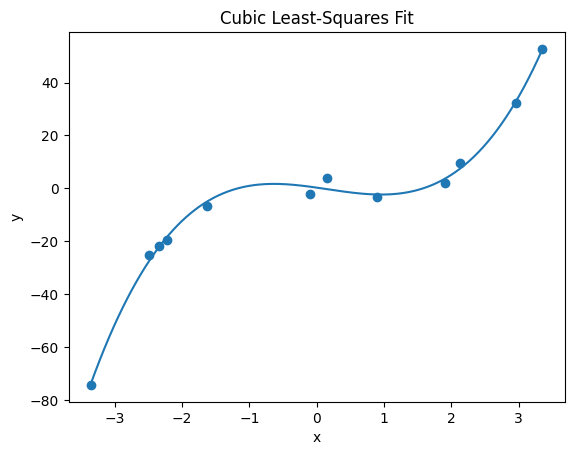

In [16]:
import matplotlib.pyplot as plt

#Code Here
x1 = x.ravel()
y1 = y.ravel()

x_plot = np.linspace(x1.min(), x1.max(), 200)

y_plot = beta[0] + beta[1]*x_plot + beta[2]*x_plot**2 + beta[3]*x_plot**3

plt.scatter(x1, y1)

plt.plot(x_plot, y_plot)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Least-Squares Fit")

plt.show()

### **Problem 5: Cell Growth**
Variables t and cells (imported from above) contain six cell counts for dividing mammalian cells in a culture dish. (The times in t are in hours.) Your task is to find the exponential growth rate of the cells using linear regression. For this problem, you are not allowed to use fitlm, regress, polyfit, or any other linear regression or curve fitting tools.

a) Set up a model matrix for the linearized exponential growth equation from section 9.4.

In [17]:
#Code Here
t1 = t.ravel()
cells1 = cells.ravel()

y = np.log(cells1)

X = np.column_stack([
    np.ones_like(t1),
    t1
])

b) Calculate the pseudoinverse of the model matrix and use it to fit your model. Print the coefficient vector.

In [18]:
#Code Here
beta = np.linalg.pinv(X) @ y

print("Coefficient vector [ln(N0), k]:")
print(beta)

Coefficient vector [ln(N0), k]:
[0.39959274 0.06620964]


c) Calculate the exponential growth rate of the cells. What are the units?

ANSWER HERE: $k=0.0662\ hours^{-1}$

d) Use the fitted parameters to find the inital number of cells. How does this value compare with the number of cells at t = 0 h in your data?

ANSWER HERE: $N_0=1.49$
The measured number of cells at t=0 h is 1.13. The fitted value is slightly higher by about 0.36, which is expected because the model uses least-squares fitting across all data points rather than matching the first point exactly.

e) Show the original data as a scatter plot using scatter and the fitted linear model as a line using plot. Both the data and the model should be on the same figure.

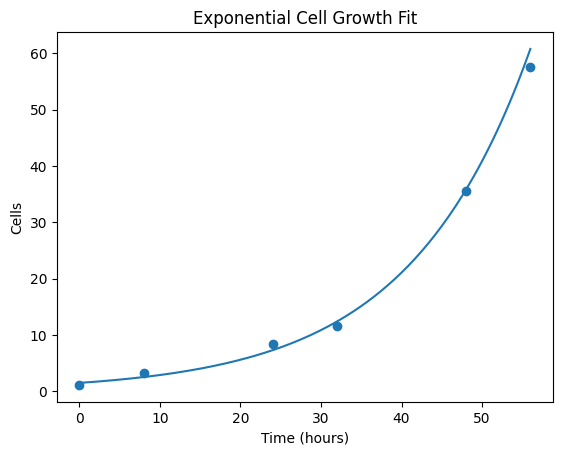

In [22]:
#Code Here
t_plot = np.linspace(t1.min(), t1.max(), 200)
cells_fit = np.exp(beta[0] + beta[1]*t_plot)

plt.scatter(t1, cells1)
plt.plot(t_plot, cells_fit)

plt.xlabel("Time (hours)")
plt.ylabel("Cells")
plt.title("Exponential Cell Growth Fit")
plt.show()

f) Use your model to predict the number of cells at each time point in t. Store the predictions in a variable ypred and print.

In [23]:
#Code Here
ypred = np.exp(beta[0] + beta[1]*t1)

print("Predicted cells:")
print(ypred)

Predicted cells:
[ 1.49121727  2.53265941  7.30547611 12.40750308 35.78954076 60.78438019]


g) Calculate the root mean squared error (RMSE) for the fitted model using the sqrt and sum functions. Print your answer.

In [24]:
#Code Here
RMSE = np.sqrt(np.sum((cells1 - ypred)**2) / len(cells1))
print("RMSE =", RMSE)

RMSE = 1.4608863816421833
